In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
%load_ext autoreload
%autoreload 2
%run '../main.py'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
dataSetOps = DataSetOps()

dataSetOps.import_years(2017, 2017)

dataSetOps.prepare()


df = dataSetOps.df

In [72]:
len(df)

370635

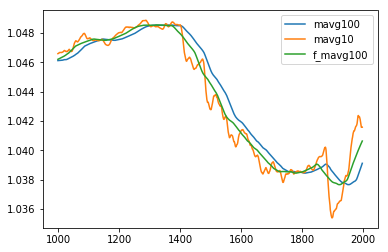

In [120]:
df['f_mavg100'] = df['mavg100'].shift(-30)
df['value'] = df['mavg100'] < df['f_mavg100']
df[['mavg100', 'mavg10', 'f_mavg100']].head(1000).plot()

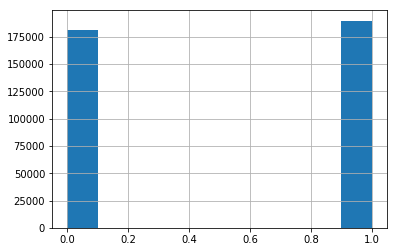

In [121]:
df['value'].astype(int).hist()

In [127]:
X = df[['price', 'mavg10', 'mavg20', 'mavg1000']]
Y = df['value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [128]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 4))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling Neural Network
from keras import metrics
metric_names = [metrics.mae]
classifier.compile(optimizer='adam', loss = 'mean_squared_error', metrics=metric_names)

# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, epochs = 2)

/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4, units=16, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  if sys.path[0] == '':
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/2
333571/333571 [==============================] - 16s 49us/step - loss: 0.2367 - mean_absolute_error: 0.4746
Epoch 2/2
333571/333571 [==============================] - 16s 48us/step - loss: 0.2302 - mean_absolute_error: 0.4598


In [129]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
from lib.helper import AccuracyCalculator

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, (y_pred > 0.5))

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(y_pred[:,0], y_test, 100)
risk_hist_df = AccuracyCalculator.risk_hist(y_pred[:,0], y_test)


class_accuracy => accuracy:  0.6261482219247005 risk:  0.3794091316025067
optimistic_accuracy => risk:  0.28 min pass point:  0.92599404


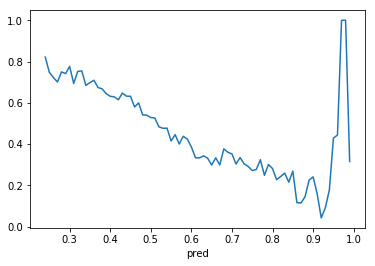

In [130]:
risk_hist_df.risk.plot()

In [131]:
X_test

array([[-0.66181847, -0.66594692, -0.66416309, -0.62476826],
       [-1.20286979, -1.19989682, -1.19956582, -1.22097544],
       [ 1.12539749,  1.12659638,  1.13420092,  1.31018555],
       ...,
       [ 1.3483334 ,  1.3469037 ,  1.34206639,  1.31356585],
       [-1.32159887, -1.33138257, -1.33332819, -1.37388913],
       [ 1.24903273,  1.24777914,  1.24588544,  1.20357312]])

In [132]:
cm

array([[ 9461,  8476],
       [ 5263, 13864]])

In [48]:
risk_hist_df

,ok,not_ok,risk
pred,,,
0.49,73636,74821,0.503991
